In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('Zoo.csv')

In [6]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
data.shape

(101, 18)

In [9]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
data['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [11]:
dup=data['animal name'].value_counts()
dup[dup>1]

frog    2
Name: animal name, dtype: int64

In [12]:
dup1=data[data['animal name']=='frog']
dup1

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [13]:
data['animal name'][(data['venomous']==1)&(data['animal name']=='frog')]='frog2'

In [14]:
data['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [21]:
data[data['animal name']=='frog2']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
26,frog2,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [22]:
data[data['animal name']=='frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5


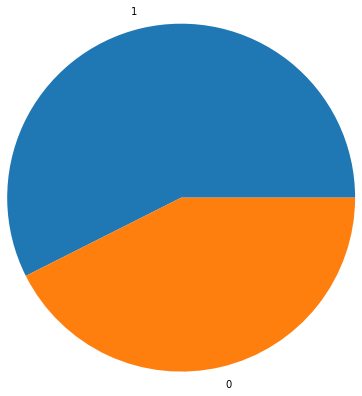

In [24]:
label=[1,0]
plt.pie(data['hair'].value_counts(),labels=label,radius=2)
plt.ylabel(" ")
plt.show()

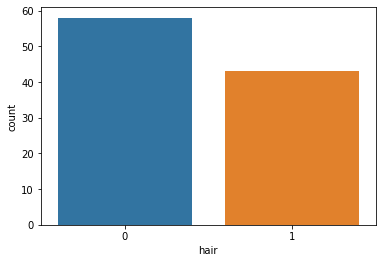

In [25]:
sns.countplot(x='hair',data=data)
plt.xlabel('hair')
plt.ylabel('count')
plt.show()

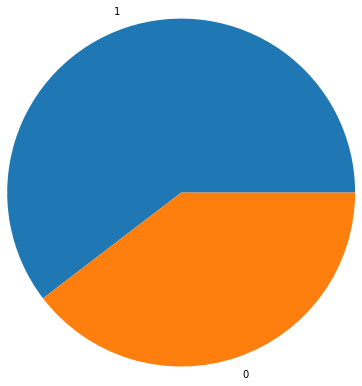

In [31]:
plt.pie(data['toothed'].value_counts(),labels=label,radius=2)
plt.ylabel(" ")
plt.show()

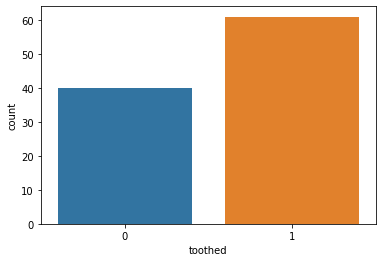

In [32]:
sns.countplot(x='toothed',data=data)
plt.xlabel('toothed')
plt.ylabel('count')
plt.show()

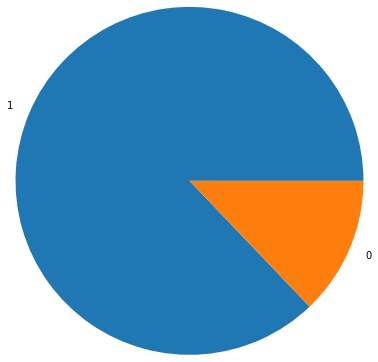

In [33]:
plt.pie(data['domestic'].value_counts(),labels=label,radius=2)
plt.ylabel(" ")
plt.show()

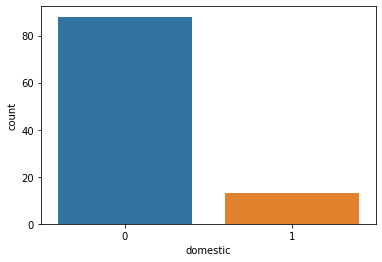

In [34]:
sns.countplot(x='domestic',data=data)
plt.xlabel('domestic')
plt.ylabel('count')
plt.show()

In [36]:
data['type'].value_counts().sort_values()

5     4
3     5
6     8
7    10
4    13
2    20
1    41
Name: type, dtype: int64

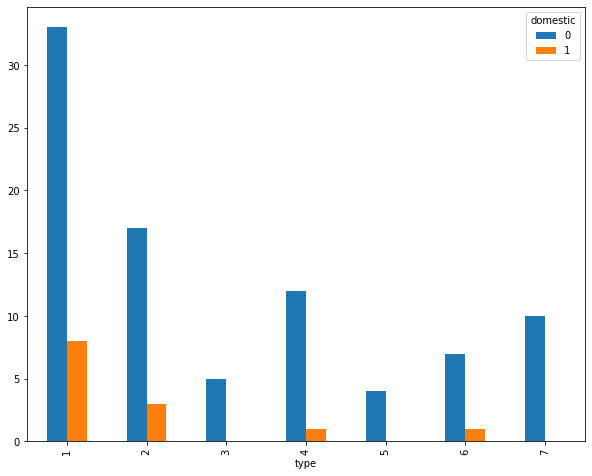

In [42]:

pd.crosstab(data['type'],data['domestic']).plot(kind="bar",figsize=(10,8))
plt.show()

In [37]:
data['legs'].value_counts()

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64

In [43]:
data['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

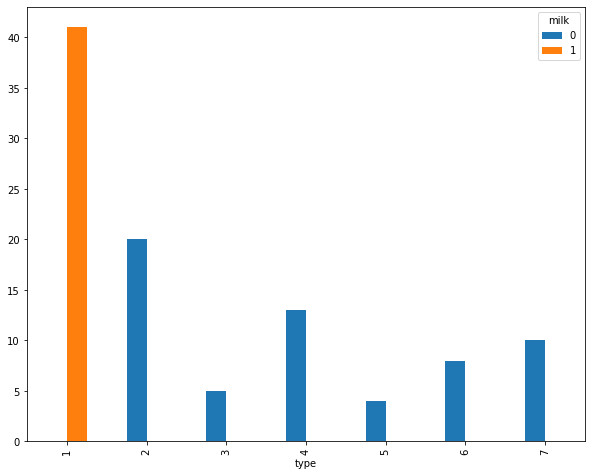

In [44]:
pd.crosstab(data['type'],data['milk']).plot(kind="bar",figsize=(10, 8))
plt.show()

In [45]:
data['aquatic'].value_counts()

0    65
1    36
Name: aquatic, dtype: int64

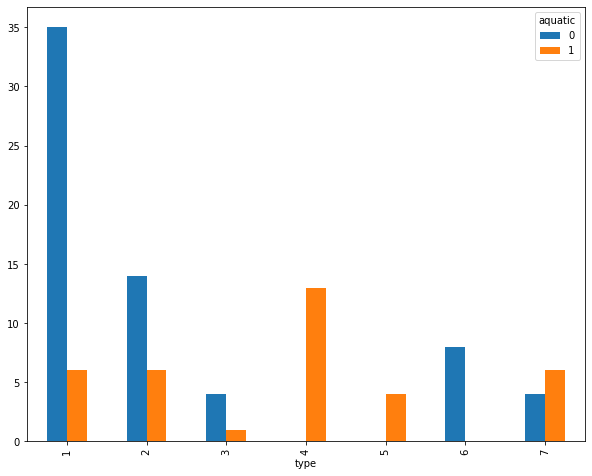

In [46]:
pd.crosstab(data['type'],data['aquatic']).plot(kind="bar", figsize=(10, 8))
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

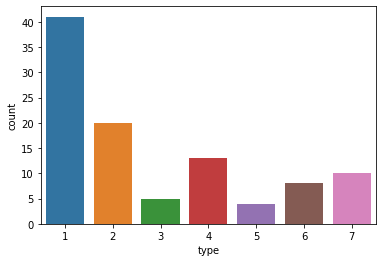

In [49]:
sns.countplot('type',data=data)

In [60]:
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [62]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
19,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1
58,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


In [63]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
78,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
82,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
52,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0


In [64]:
Y_train

73    4
19    1
27    1
48    1
58    2
     ..
75    1
9     1
72    7
12    4
37    2
Name: type, Length: 70, dtype: int64

In [65]:
Y_test

94     1
78     2
17     1
100    2
36     1
85     7
55     1
83     2
82     4
52     5
95     2
44     1
31     1
93     1
65     1
35     1
66     1
70     1
81     7
80     3
33     2
32     1
40     6
39     6
38     4
46     7
42     6
10     1
2      4
54     1
67     1
Name: type, dtype: int64

In [66]:
num_folds=10
kfold=KFold(n_splits=10)

In [67]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
pred=model.predict(X_test)
pd.Series(pred)

0     1
1     2
2     1
3     2
4     1
5     7
6     1
7     2
8     4
9     5
10    2
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    7
19    4
20    2
21    1
22    6
23    6
24    4
25    6
26    6
27    1
28    4
29    1
30    1
dtype: int64

In [70]:
result=cross_val_score(model,x,y,cv=kfold)

In [71]:
result.mean()

0.9400000000000001

In [74]:
n_neighbors = np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)

In [75]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [76]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


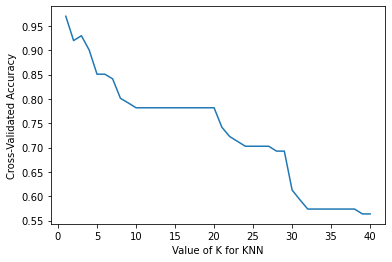

In [78]:
%matplotlib inline
k_range = range(1, 41)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x,y,cv=5)
    k_scores.append(scores.mean())
# plotting
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [79]:
#best accuracy with 0.97 with K=1